# Predict Sentiments of Amazon Customers

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset file

reviews = pd.read_csv('D:\INTERNSHIP_PROJECTS\Predict_Sentiments_of_Amazon_Customers\Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# dataset size

reviews.shape

(568454, 10)

In [4]:
# dataset columns

reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
# Add new columns in the dataset

reviews['Helpful%'] = np.where(reviews['HelpfulnessNumerator']>0, reviews['HelpfulnessNumerator']/reviews['HelpfulnessDenominator'], -1)
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [6]:
reviews['Helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.5       ,  0.66666667,
        0.25      ,  0.89473684,  0.83333333,  0.75      ,  0.33333333,
        0.3       ,  0.11111111,  0.42857143,  0.875     ,  0.85714286,
        0.2       ,  0.26315789,  0.6       ,  0.71428571,  0.53846154,
        0.57142857,  0.91489362,  0.86666667,  0.82352941,  0.78571429,
        0.74074074,  0.4       ,  0.375     ,  0.28571429,  0.14285714,
        0.77777778,  0.125     ,  0.9       ,  0.94117647,  0.92307692,
        0.7       ,  0.45454545,  0.88888889,  0.83870968,  0.9047619 ,
        0.92857143,  0.90909091,  0.91666667,  0.84615385,  0.10526316,
        0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,  0.1       ,
        0.18518519,  0.88      ,  0.69230769,  0.625     ,  0.54545455,
        0.41666667,  0.45833333,  0.22222222,  0.81818182,  0.8125    ,
        0.16666667,  0.93103448,  0.88235294,  0.23529412,  0.63636364,
        0.81481481,  0.95652174,  0.64285714,  0.58333333,  0.94

In [7]:
# Cut data into some slides
# Analysis upvote for different score

reviews['%Upvote'] = pd.cut(reviews['Helpful%'], bins=[-1,0, 0.2, 0.4, 0.6, 0.8, 1], 
                            labels = ['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [8]:
reviews.groupby(['Score','%Upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %Upvote                                                                 
1     Empty         0          0       0            0                     0   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty         0          0       0            0                     0   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty         0          0       0            0                     0   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty         0          0       0            0                     0   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty         0          0       0            0                     0   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %Upvote                                                             
1     Empty                         0       0        0       0         0  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                         0       0        0       0         0  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                         0       0        0       0         0  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [9]:
dataset = reviews.groupby(['Score','%Upvote']).agg({'Id':'count'}).reset_index()
dataset

,Score,%Upvote,Id
0,1,Empty,0
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,0
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [10]:
# Create pivot table

pivot = dataset.pivot(index = '%Upvote', columns='Score')
pivot

Id                            
Score        1     2      3      4       5
%Upvote                                   
Empty        0     0      0      0       0
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='%Upvote'>

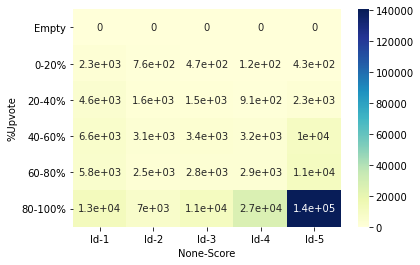

In [11]:
# Heatmap 

sns.heatmap(pivot, annot=True, cmap='YlGnBu')

In [12]:
reviews['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [13]:
# remove all 3 as it represent a neutral score

data = reviews[reviews['Score']!=3]
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%Upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [14]:
data['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

In [15]:
X = data['Text']
X

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 525814, dtype: object

In [16]:
dict = {1:0, 2:0, 4:1, 5:1}
y = data['Score'].map(dict)
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

## Apply Bag of words, calculate test accuracy and print top 20 positive and negative words

In [17]:
# Apply bag of words on data
# Check accuracy for testing data
# Fetch top 20 positive and negative words

def text_fit(X, y, nlp_model, ml_model, coeff_show=1):
    X_cnt = nlp_model.fit_transform(X)
    print('features:{}'.format(X_cnt.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_cnt, y)
    ml = ml_model.fit(X_train, y_train)
    print('Testing Accuracy : ')
    acc = ml.score(X_test, y_test)
    print(acc)
    
    if coeff_show==1:
        word = cnt.get_feature_names()
        coeff = ml.coef_.tolist()[0]
        coeff_file = pd.DataFrame({'Word':word, 'Coefficient':coeff})
        coeff_file = coeff_file.sort_values(['Coefficient', 'Word'], ascending=False)
        print('\n')
        print('Top 20 positive words: ')
        print(coeff_file.head(20))
        print('\n')
        print('Top 20 negative words: ')
        print(coeff_file.tail(20))   

## Confusion matrix and accuracy of the model

In [18]:
# Predictions

def predict(X,y,nlp_model, ml_model):
    X_cnt = nlp_model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_cnt, y)
    ml = ml_model.fit(X_train, y_train)
    predictions = ml.predict(X_test)
    cm = confusion_matrix(predictions, y_test)
    print('Confusion Matrix: ')
    print(cm)
    print('\n')
    acc = accuracy_score(predictions, y_test)
    print('Accuracy of the model: ')
    print(acc)

# Apply Logistic Regression 

In [19]:
# Apply Logistic Regression to our data

cnt = CountVectorizer()
lr = LogisticRegression()

In [ ]:
text_fit(X,y,cnt, lr)

features:115282
Testing Accuracy : 
0.9376816224686962


In [ ]:
predict(X,y,cnt,lr)